In [51]:
# 1. Import libraries and load data from cleaned CSV file
import pandas as pd

df = pd.read_csv('cleaned_bank.csv', sep=',')

In [52]:
#lets take a look at the first few rows of the dataset
df.columns

Index(['age', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'prior_contact', 'campaign_capped',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'po

In [53]:
#Lets do basic info check before EDA
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39328 entries, 0 to 39327
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            39328 non-null  int64  
 1   previous                       39328 non-null  int64  
 2   emp.var.rate                   39328 non-null  float64
 3   cons.price.idx                 39328 non-null  float64
 4   cons.conf.idx                  39328 non-null  float64
 5   euribor3m                      39328 non-null  float64
 6   nr.employed                    39328 non-null  float64
 7   y                              39328 non-null  int64  
 8   prior_contact                  39328 non-null  int64  
 9   campaign_capped                39328 non-null  int64  
 10  job_blue-collar                39328 non-null  bool   
 11  job_entrepreneur               39328 non-null  bool   
 12  job_housemaid                  39328 non-null 

,age,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,prior_contact,campaign_capped,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,...,True,False,False,False,True,False,False,False,True,False
1,57,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,...,True,False,False,False,True,False,False,False,True,False
2,37,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,...,True,False,False,False,True,False,False,False,True,False
3,40,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,...,True,False,False,False,True,False,False,False,True,False
4,56,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,...,True,False,False,False,True,False,False,False,True,False


Lets start doing some EDA on numerical features:

Below are some of the columns that will be used

Integers: age, previous, y, prior_contact, campaign_capped

Floats: emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed

In [54]:
#lets get some summary statistics for the numerical features
summary_num_cols = ['age', 'previous', 'y', 'prior_contact', 'campaign_capped','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
df[summary_num_cols].describe()

,age,previous,y,prior_contact,campaign_capped,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,39328.000000,39328.000000,39328.000000,39328.000000,39328.000000,39328.000000,39328.000000,39328.000000,39328.000000,39328.000000
mean,40.123296,0.178677,0.116762,0.038268,2.307516,0.062614,93.577277,-40.499153,3.600014,5165.932799
std,10.462038,0.502933,0.321140,0.191845,1.558554,1.577317,0.584131,4.646164,1.742504,72.751951
min,17.000000,0.000000,0.000000,0.000000,1.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,0.000000,0.000000,0.000000,1.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,0.000000,0.000000,0.000000,2.000000,1.100000,93.798000,-41.800000,4.857000,5191.000000
75%,47.000000,0.000000,0.000000,0.000000,3.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,7.000000,1.000000,1.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


| **Feature**          | **Mean**        | **What the Mean Tells Us**                                                                                                                                   |
| -------------------- | --------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **age**              | 40.12 years     | The average client age is about 40, suggesting a relatively mature audience. This age distribution may impact product targeting or campaign strategies.      |
| **previous**         | 0.18 contacts   | On average, clients had less than one prior contact. This indicates most clients were contacted for the first time, which could affect response behavior.    |
| **y** (target)       | 0.1176 (≈11.8%) | About 11.8% of clients subscribed to the product. This low mean highlights class imbalance and suggests most clients said "no."                              |
| **prior\_contact**   | 0.038 (≈3.8%)   | Only around 3.8% of clients had been contacted before. This aligns with the low `previous` value and reinforces the idea that most contacts were first-time. |
| **campaign\_capped** | 2.31 contacts   | Clients were contacted roughly 2.3 times per campaign, showing that follow-ups were common, but not excessive.                                               |
| **emp.var.rate**     | 0.063           | The employment variation rate is slightly positive on average, hinting at modest job market growth in the data period.                                       |
| **cons.price.idx**   | 93.58           | This reflects the average consumer price index over the period. Prices were relatively stable, as shown by a low standard deviation.                         |
| **cons.conf.idx**    | -40.5           | On average, consumer confidence was negative, reflecting pessimism or uncertainty in the economic environment.                                               |
| **euribor3m**        | 3.6%            | The 3-month Euribor rate averaged around 3.6%, reflecting the general interest rate.euribor3m stands for the 3-month Euro Interbank Offered Rate. It is the interest rate at which European banks are willing to lend money to each other for a 3-month period.                                                             |
| **nr.employed**      | 5165.93         | The average number of employees was about 5,166 (in thousands), likely representing overall employment in the country or region at the time.                 |


# 📊 Up Next: Distribution Analysis of Numerical Features

This section explores the distributions of key numerical features in the dataset using histograms with kernel density estimates (KDE). The goal is to identify skewness, modality, and data imbalance, which are critical for feature engineering and modeling.

**Note

KDE is a method to visualize the distribution of data points.KDE places a smooth curve (called a "kernel") on each data point, and then adds them all together to create a continuous, smooth curve that estimates the overall distribution.

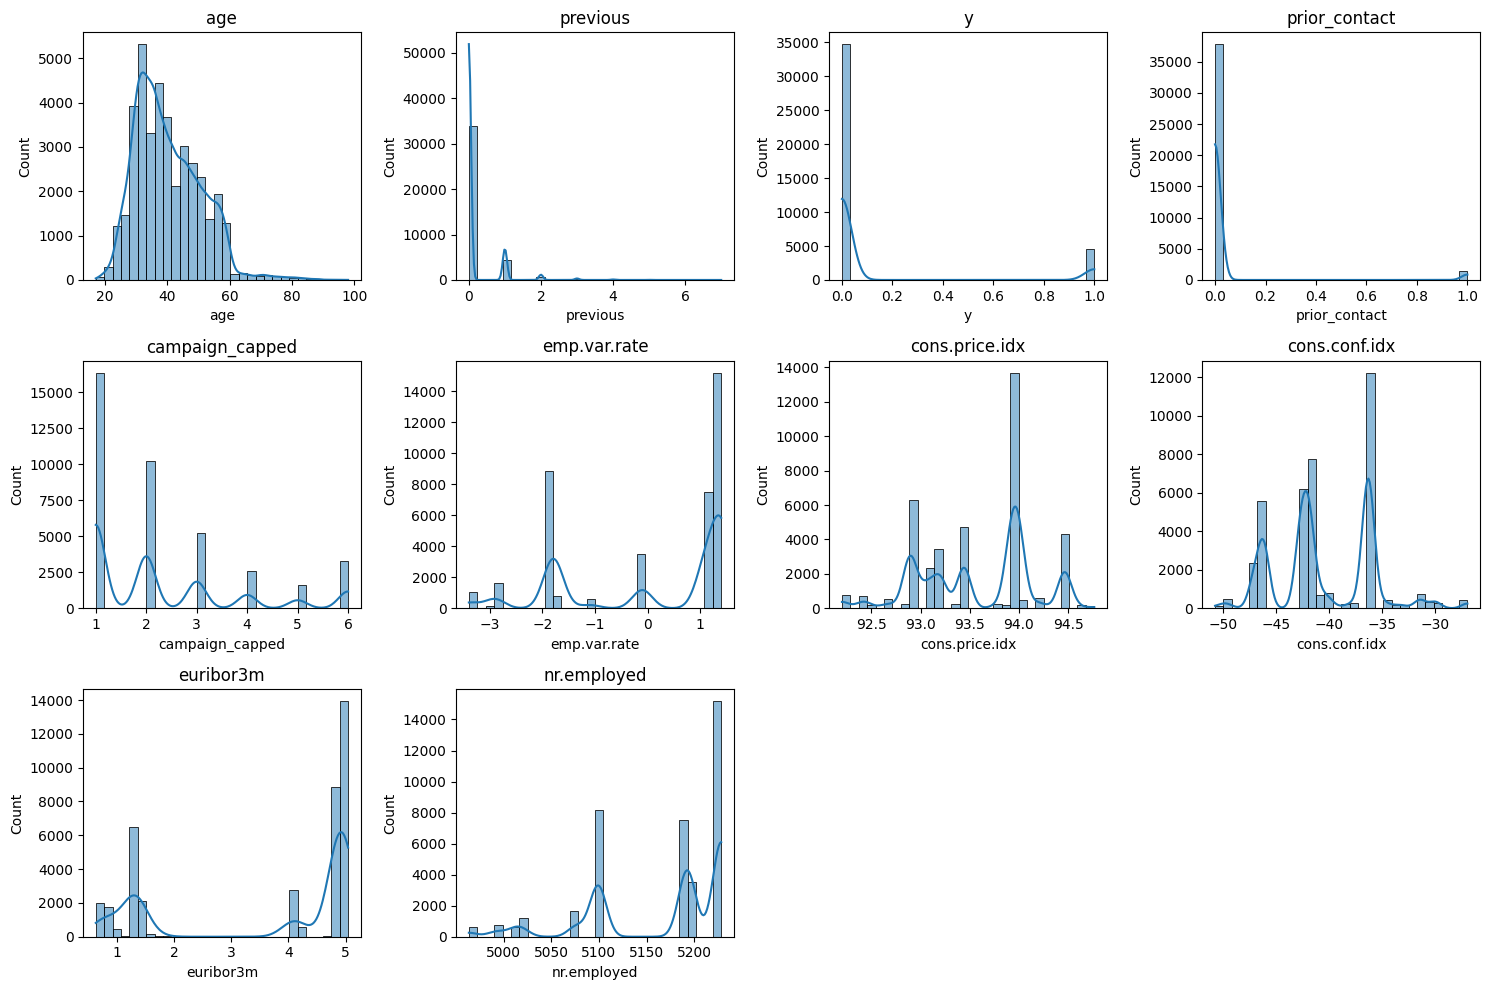

In [55]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Clean data: replace inf with NaN to avoid deprecated warning
df_cleaned = df[summary_num_cols].replace([np.inf, -np.inf], np.nan)
with warnings.catch_warnings():
    warnings.simplefilter("ignore", FutureWarning)
    # Create plots
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(summary_num_cols):
        plt.subplot(3, 4, i + 1)
        sns.histplot(df_cleaned[col].dropna(), bins=30, kde=True)
        plt.title(col)
    plt.tight_layout()
    plt.show()


# 📊 Distribution Analysis of Numerical Features

This section explores the distributions of key numerical features in the dataset using histograms with kernel density estimates (KDE). The goal is to identify skewness, modality, and data imbalance, which are critical for feature engineering and modeling.

---

## 🔹 `age`
- **Shape**: Right-skewed  
- **Insight**: Most clients are aged between 30–50, with a long tail of older individuals.  
- **Note**: Could benefit from binning (e.g., 18–30, 31–45, etc.) to reduce noise.

---

## 🔹 `previous`
- **Shape**: Extremely right-skewed  
- **Insight**: Most clients had zero or one prior contact; very few had more than 2.  
- **Note**: Strong candidate for log transformation or categorization.

---

## 🔹 `y` (target variable)
- **Shape**: Highly imbalanced binary  
- **Insight**: Most clients did **not** subscribe (value = 0).  
- **Note**: Consider using stratified sampling or techniques like SMOTE when modeling.

---

## 🔹 `prior_contact`
- **Shape**: Binary  
- **Insight**: Vast majority of clients were **not** contacted before.  
- **Note**: Could be treated as a categorical feature.

---

## 🔹 `campaign_capped`
- **Shape**: Multimodal, slight right skew  
- **Insight**: Most clients were contacted 1–3 times, with some capped at 6.  
- **Note**: May be important to test diminishing returns (too many contacts could lower success).

---

## 🔹 `emp.var.rate`
- **Shape**: Multimodal, not continuous  
- **Insight**: Employment variation rate has distinct peaks, suggesting time-based economic changes.  
- **Note**: Could be useful as a **temporal proxy** or market condition indicator.

---

## 🔹 `cons.price.idx`
- **Shape**: Bumpy and multimodal  
- **Insight**: Shows grouped clusters, possibly reflecting inflation trends over time.  
- **Note**: Likely reflects macroeconomic periods — test its interaction with `y`.

---

## 🔹 `cons.conf.idx`
- **Shape**: Multimodal and left-skewed  
- **Insight**: Consumer confidence varied significantly, with peaks near -36 and -41.  
- **Note**: As with `emp.var.rate`, this could indicate time or market conditions.

---

## 🔹 `euribor3m`
- **Shape**: Bimodal  
- **Insight**: Two distinct clusters (around ~1 and ~5), hinting at two different economic regimes (e.g., recession vs recovery).  
- **Note**: Useful to create "low interest" vs "high interest" bins.

---

## 🔹 `nr.employed`
- **Shape**: Multimodal  
- **Insight**: Similar to `euribor3m` and `emp.var.rate`, this varies in steps—likely tied to economic time slices.  
- **Note**: Could benefit from creating employment-level bands or categorical ranges.

---

## 📌 Summary

- Most features show **non-normal**, **skewed**, or **multimodal** distributions.
- Several features are **time-dependent economic indicators** (e.g., `emp.var.rate`, `euribor3m`, `nr.employed`) and may correlate with each other.
- `y` is **highly imbalanced**, which should be addressed during modeling (e.g., stratified sampling, SMOTE, or class weights).

---



In [56]:
#I want to create a blank to hold all the categorical features
categorical_cols = ['contact_telephone', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'default_unknown', 'default_yes', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'housing_unknown', 'housing_yes', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'loan_unknown', 'loan_yes', 'marital_married', 'marital_single', 'marital_unknown', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_nonexistent', 'poutcome_success']


# 📁 Categorical Variable Groupings & Target Mapping

The dataset includes a wide range of categorical features. To better understand their relationship to the target variable `y` (`0` = did **not** subscribe, `1` = **subscribed**), we group them into logical categories before conducting analysis.

---

## 🧑‍💼 Job-Related Features (11 columns)
Represents the client's occupation or work status. This may directly impact subscription likelihood due to financial security or professional engagement.

---

## 💍 Marital Status (3 columns)
Provides insight into the client's family situation, which can influence financial priorities or risk tolerance.

---

## 🎓 Education Level (7 columns)
Captures the client’s highest education level — a potential proxy for income level, awareness, and financial literacy.

---

## 💳 Financial Status (6 columns)
Includes variables on default history, housing loan, and personal loan status. These are strong indicators of financial health or debt burden.

---

## 📞 Contact & Timing Details (13 columns)
Covers contact type, day of the week, and month of contact. Timing can significantly influence client receptiveness or availability.

---

## 📈 Previous Outcome (2 columns)
Includes the result of any previous marketing attempts. This is useful for identifying warm leads or understanding resistance.

---

## 🎯 Objective
For each of these grouped feature sets, we will map them against the target variable `y` to analyze conversion behavior:
- `y = 0`: Client **did not** subscribe
- `y = 1`: Client **subscribed**

This breakdown helps us explore **categorical relationships**, identify promising subgroups, and uncover bias or imbalance patterns that might inform modeling or strategy.

---


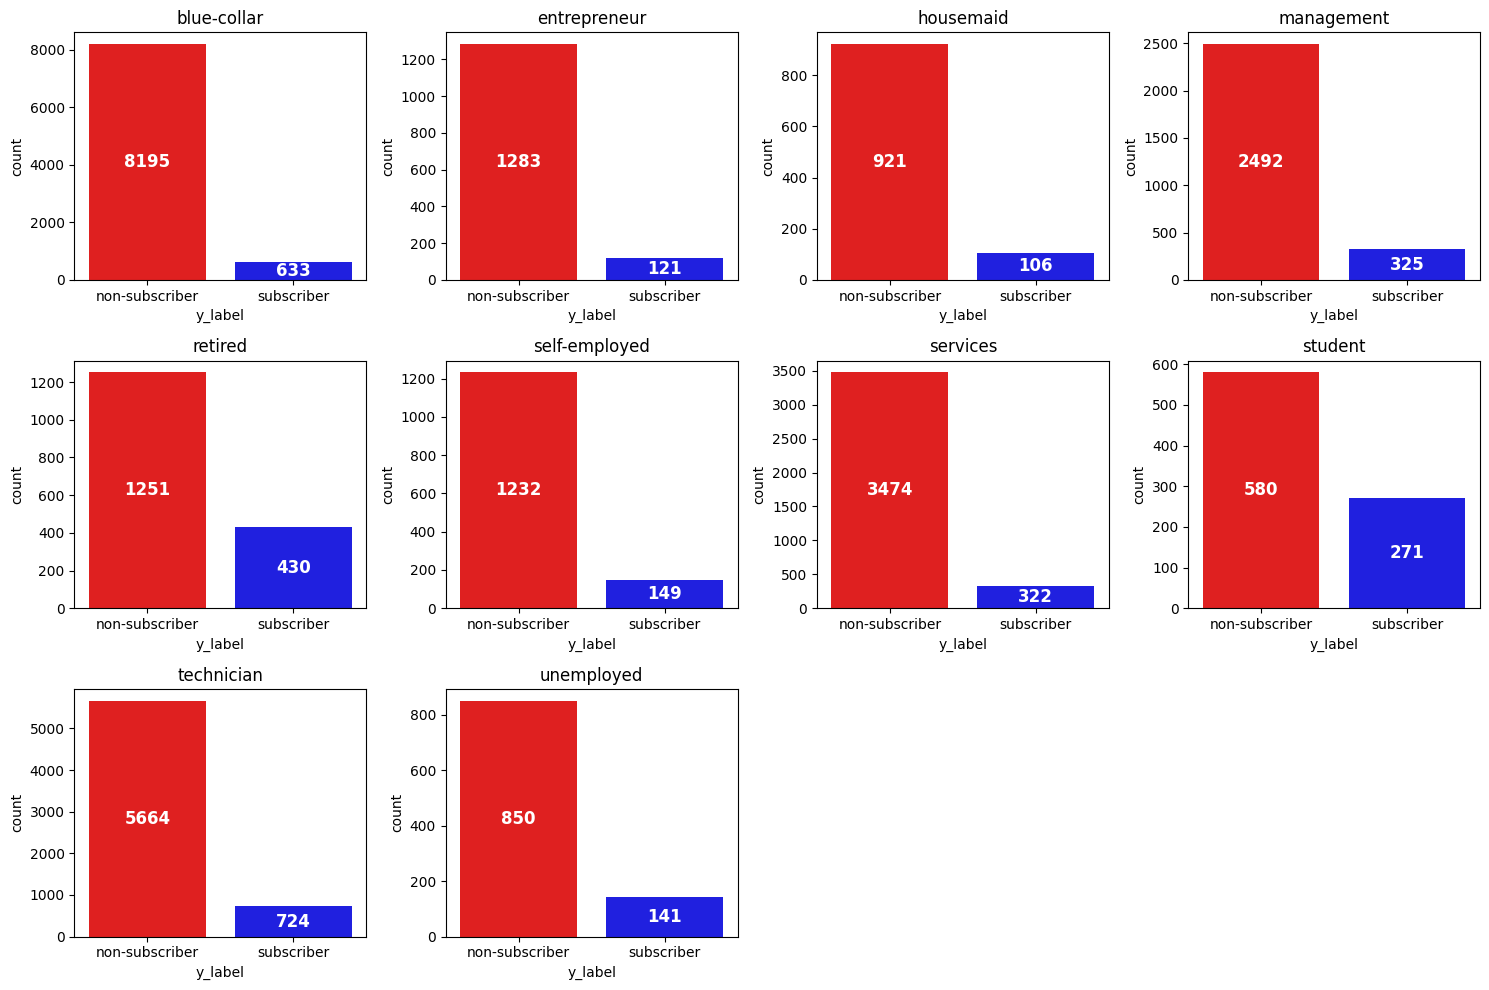

In [57]:
# Add readable label column
df['y_label'] = df['y'].map({0: 'non-subscriber', 1: 'subscriber'})

job_cols = [col for col in categorical_cols if isinstance(col, str) and col.startswith('job_')]

plt.figure(figsize=(15, 10))
palette = {'non-subscriber': 'red', 'subscriber': 'blue'}

for i, col in enumerate(job_cols[:10]):  # limit to first 10 for clarity
    plt.subplot(3, 4, i + 1)

    temp = df[df[col] == 1].copy()
    
    ax = sns.countplot(data=temp, x='y_label', hue='y_label', palette=palette, legend=False)
    plt.title(col.replace('job_', ''))

    # Add count labels inside bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2,
            height * 0.5,
            int(height),
            ha='center', va='center',
            color='white', fontsize=12,
            fontweight='bold'
        )

plt.tight_layout()
plt.show()


# 📊 Job Category vs. Subscription Outcome (`y`)

Each job category was analyzed to understand how clients responded to the marketing campaign — specifically, whether they subscribed (`y = 1`) or not (`y = 0`).

## 🧠 Key Findings

### ✅ High Conversion Groups
- **Students** showed the **highest conversion rate** (~32%), suggesting this group is highly receptive to the campaign.
- **Retired individuals** also had a **strong conversion rate** (~25%), despite being a smaller group.
- These categories may be more open to long-term financial planning or saving products.

### ⚠️ Low Conversion Groups
- **Blue-collar workers** had a **very low conversion rate** (~7%), though they make up one of the **largest segments** of the dataset.
- **Housemaids** also showed poor conversion (~10%), despite moderate representation.
- **Entrepreneurs** and **self-employed** groups displayed low conversion percentages as well, likely due to variable income or financial uncertainty.

### 📉 General Patterns
- The **class imbalance** is clearly visible across all job categories — in every case, there are more clients who did **not** subscribe (`y = 0`).
- The gap between `y = 0` and `y = 1` is particularly wide for jobs like **technician**, **blue-collar**, and **services**, despite their large sample sizes.

## 📌 Implications
- Targeted marketing strategies may benefit from focusing more on **students and retirees**, who show a higher willingness to engage.
- Groups with low conversion but high volume (like **blue-collar**) may require **different messaging or channels** to improve campaign effectiveness.
- Consider incorporating **conversion rate per job** as a new feature for modeling.



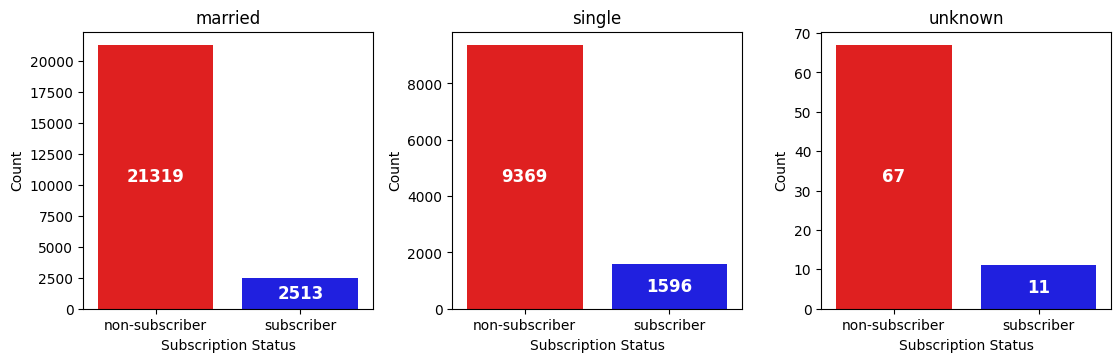

In [58]:
# Step 1: Map y to readable labels if not done already
df['y_label'] = df['y'].map({0: 'non-subscriber', 1: 'subscriber'})

# Step 2: Define color palette
palette = {'non-subscriber': 'red', 'subscriber': 'blue'}

# Step 3: Get marital dummy columns
marital_cols = [col for col in categorical_cols if col.startswith('marital_')]

plt.figure(figsize=(15, 10))
for i, col in enumerate(marital_cols):
    plt.subplot(3, 4, i + 1)

    # Select rows where that marital status applies (dummy column = 1)
    temp = df[df[col] == 1].copy()

    # Plot with hue='y_label' for readable legend + controlled colors
    ax = ax = sns.countplot(data=temp, x='y_label', hue='y_label', palette=palette, legend=False)

    plt.title(col.replace('marital_', ''))
    plt.xlabel('Subscription Status')
    plt.ylabel('Count')

    # Add count labels inside bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2,
            height * 0.5,
            int(height),
            ha='center', va='center',
            color='white', fontsize=12,
            fontweight='bold'
        )

plt.tight_layout()
plt.show()


# 💍 Marital Status vs. Subscription Outcome (`y`)

This analysis examines how a client's marital status relates to their likelihood of subscribing (`y = 1`) or not (`y = 0`) to the marketing offer.

---

## 📊 Key Findings

### 🔴 Married Clients
- **Non-subscribers**: 21,319  
- **Subscribers**: 2,513  
- **Conversion Rate**: ~10.5%  
- **Insight**: This is the largest group by volume, but it has a relatively **low conversion rate**.

---

### 🔵 Single Clients
- **Non-subscribers**: 9,369  
- **Subscribers**: 1,596  
- **Conversion Rate**: ~14.5%  
- **Insight**: Singles are **more likely to convert** than married individuals, despite being a smaller group.

---

### ⚪ Unknown Marital Status
- **Non-subscribers**: 67  
- **Subscribers**: 11  
- **Conversion Rate**: ~14.1%  
- **Insight**: Too few observations for strong conclusions, but conversion is similar to the single group.

---

## 📌 Interpretation

- **Single clients** appear to be more receptive to the product than **married clients**.
- **Married clients**, while the largest segment, convert at the **lowest rate**, suggesting that marital status might be a **useful feature for segmentation** or personalized targeting.
- This variable could be used to **prioritize high-probability groups** or **customize messaging**.

---

## ✅ Recommendation
- Consider engineering a binary feature (e.g., `is_single`) for modeling simplicity.
- Explore potential interactions between marital status and age or job — e.g., younger singles vs. older married individuals.



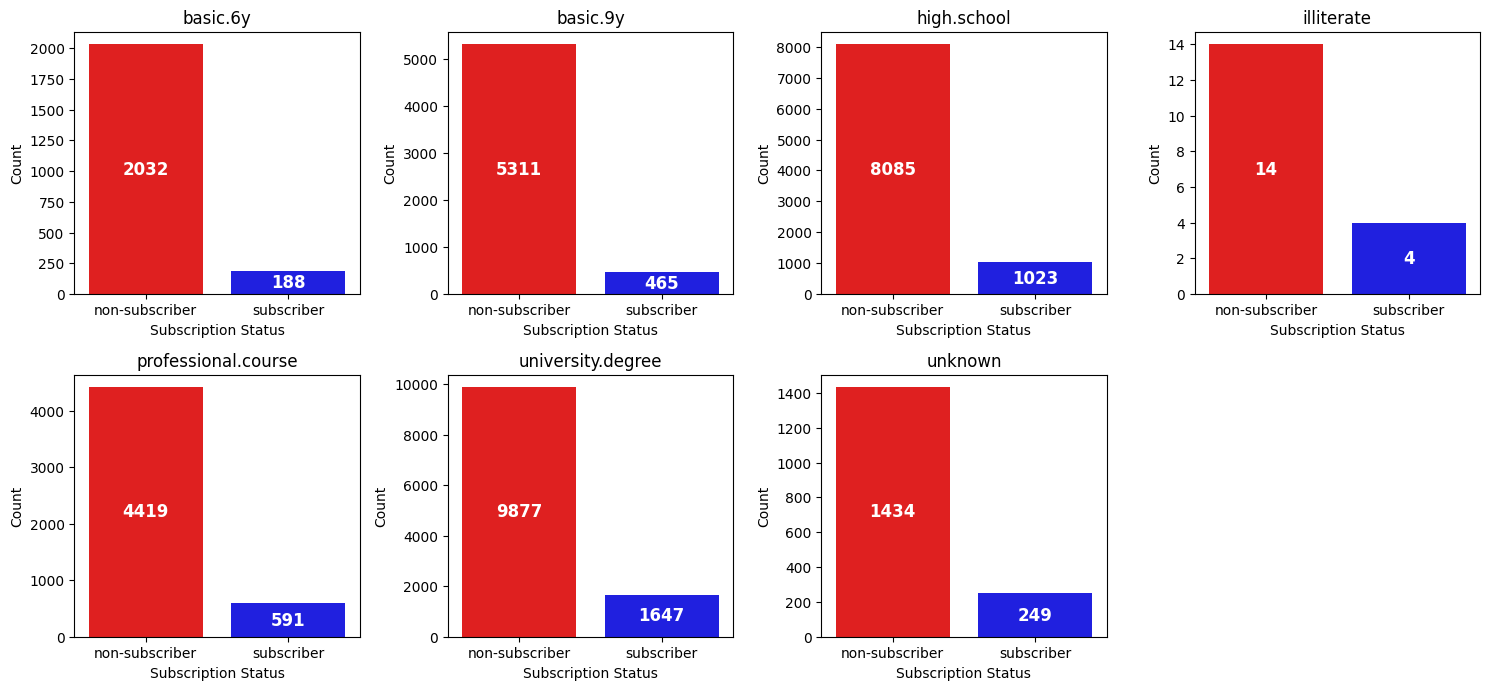

In [59]:
# Step 1: Map y to readable labels (if not already done)
df['y_label'] = df['y'].map({0: 'non-subscriber', 1: 'subscriber'})

# Step 2: Define color palette
palette = {'non-subscriber': 'red', 'subscriber': 'blue'}

# Step 3: Select education columns (assumed to be dummy variables)
education_cols = [col for col in categorical_cols if col.startswith('education_')]

plt.figure(figsize=(15, 10))

for i, col in enumerate(education_cols):
    plt.subplot(3, 4, i + 1)

    temp = df[df[col] == 1].copy()  # safer selection

    ax = sax = sns.countplot(data=temp, x='y_label', hue='y_label', palette=palette, legend=False)
    plt.title(col.replace('education_', ''))
    plt.xlabel('Subscription Status')
    plt.ylabel('Count')

    # Add count labels inside bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2,
            height * 0.5,
            int(height),
            ha='center', va='center',
            color='white', fontsize=12,
            fontweight='bold'
        )

plt.tight_layout()
plt.show()


# 📊 Subscription Status by Education Level

This visualization shows the **distribution of subscription status** (subscriber vs non-subscriber) for a marketing campaign, segmented by **education level**. The goal is to understand how educational attainment may influence the likelihood of subscribing to a service or product.

Each subplot represents a specific education level. Within each plot:
- **Red bars** indicate non-subscribers.
- **Blue bars** indicate subscribers.
- The **count** is labeled inside each bar.

---

## 🔍 Key Observations

### 1. **Basic.6y**
- **Non-subscribers:** 2,032
- **Subscribers:** 188  
✅ **Conversion is low**, but not the worst.

---

### 2. **Basic.9y**
- **Non-subscribers:** 5,311
- **Subscribers:** 465  
📉 Still a **low conversion rate**, large gap between subscribers and non-subscribers.

---

### 3. **High School**
- **Non-subscribers:** 8,085
- **Subscribers:** 1,023  
📈 **Highest raw subscriber count** so far, though the ratio still leans heavily toward non-subscribers.

---

### 4. **Illiterate**
- **Non-subscribers:** 14
- **Subscribers:** 4  
📉 **Tiny sample size**, but relatively **high conversion rate** (22%) compared to other groups.

---

### 5. **Professional Course**
- **Non-subscribers:** 4,419
- **Subscribers:** 591  
✅ **Moderate conversion**, better than many others.

---

### 6. **University Degree**
- **Non-subscribers:** 9,877
- **Subscribers:** 1,647  
📈 **Highest total participation**. Subscriber count is strong in absolute terms, but still **dominantly non-subscribers**.

---

### 7. **Unknown**
- **Non-subscribers:** 1,434
- **Subscribers:** 249  
❓ Reasonable conversion for an unknown category.

---

## 📌 Insights & Recommendations

- **Higher education** (university, professional course) seems to correlate with **more total subscriptions**, but still a **low conversion rate** overall.
- The **'illiterate' group**, despite a small sample, shows a **relatively high conversion rate**.
- Future marketing efforts could consider:
  - **Targeted messaging** for each education group.
  - **Testing new strategies** for high-engagement but low-conversion groups like university graduates.
  - **Exploring ‘unknown’ education data** for cleanup or deeper segmentation.

---

## 📎 Notes
- These plots are from a **categorical analysis** using count plots.
- It's helpful to compare not just the raw counts, but also **conversion rates**:  
  `conversion_rate = subscribers / (subscribers + non-subscribers)`

If needed, we can create a **table of conversion rates** or plot them for even clearer insight.



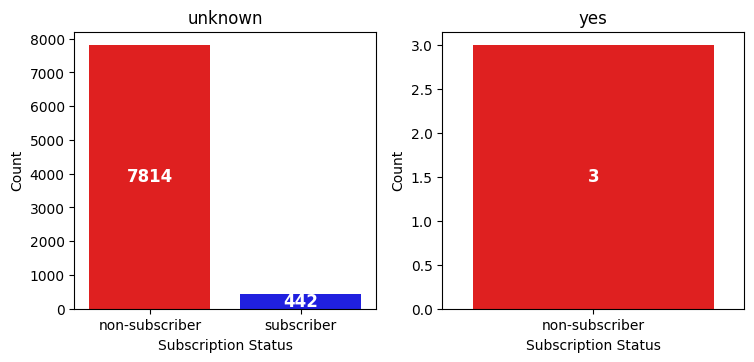

In [60]:
# Map 'y' to readable labels (only needed once)
df['y_label'] = df['y'].map({0: 'non-subscriber', 1: 'subscriber'})

# Define color palette
palette = {'non-subscriber': 'red', 'subscriber': 'blue'}

# Grab default dummy columns
default_cols = [col for col in categorical_cols if col.startswith('default_')]

plt.figure(figsize=(15, 10))

for i, col in enumerate(default_cols):
    plt.subplot(3, 4, i + 1)

    temp = df[df[col] == 1].copy()

    ax = sax = sns.countplot(data=temp, x='y_label', hue='y_label', palette=palette, legend=False)
    plt.title(col.replace('default_', ''))
    plt.xlabel('Subscription Status')
    plt.ylabel('Count')

    # Add count labels inside bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2,
            height * 0.5,
            int(height),
            ha='center', va='center',
            color='white', fontsize=12,
            fontweight='bold'
        )

plt.tight_layout()
plt.show()


# 📊 Subscription Status by Campaign Outcome

This document summarizes the distribution of **subscription status** (`subscriber` vs. `non-subscriber`) across two categories of a campaign outcome variable: `"unknown"` and `"yes"`.

*Note
Clients labeled "yes" have a known history of being positively responsive to past campaigns. These are typically considered warm leads.

Clients labeled "unknown" may have no engagement history, or the system simply didn’t track it.

---

## 🔍 Breakdown by Campaign Outcome

### 1. Outcome: `unknown`
- **Non-subscribers**: 7,814
- **Subscribers**: 442

**Insight**:
- This group shows a strong class imbalance.
- About **94.6%** of individuals in this category are non-subscribers.
- Indicates that when the outcome is unknown, subscription likelihood is low.

---

### 2. Outcome: `yes`
- **Non-subscribers**: 3
- **Subscribers**: 0

**Insight**:
- All records in this group are non-subscribers.
- **Total count is very low (n=3)**, making it statistically unreliable.
- This category may be underrepresented or require data quality review.

---

## 📈 Overall Observations
- The dataset is **heavily imbalanced** toward non-subscribers.
- The `"yes"` group has too few observations to be meaningful on its own.
- Consider balancing techniques (e.g., oversampling, SMOTE) if this data is used for modeling.
- This imbalance should be addressed during **data preprocessing and model evaluation** to avoid bias.

---

Strategic Insight
For business stakeholders: this chart visually confirms that conversion is low across both categories.

Might prompt further investigation into why "unknown" is the dominant campaign outcome and how to improve outreach efforts.


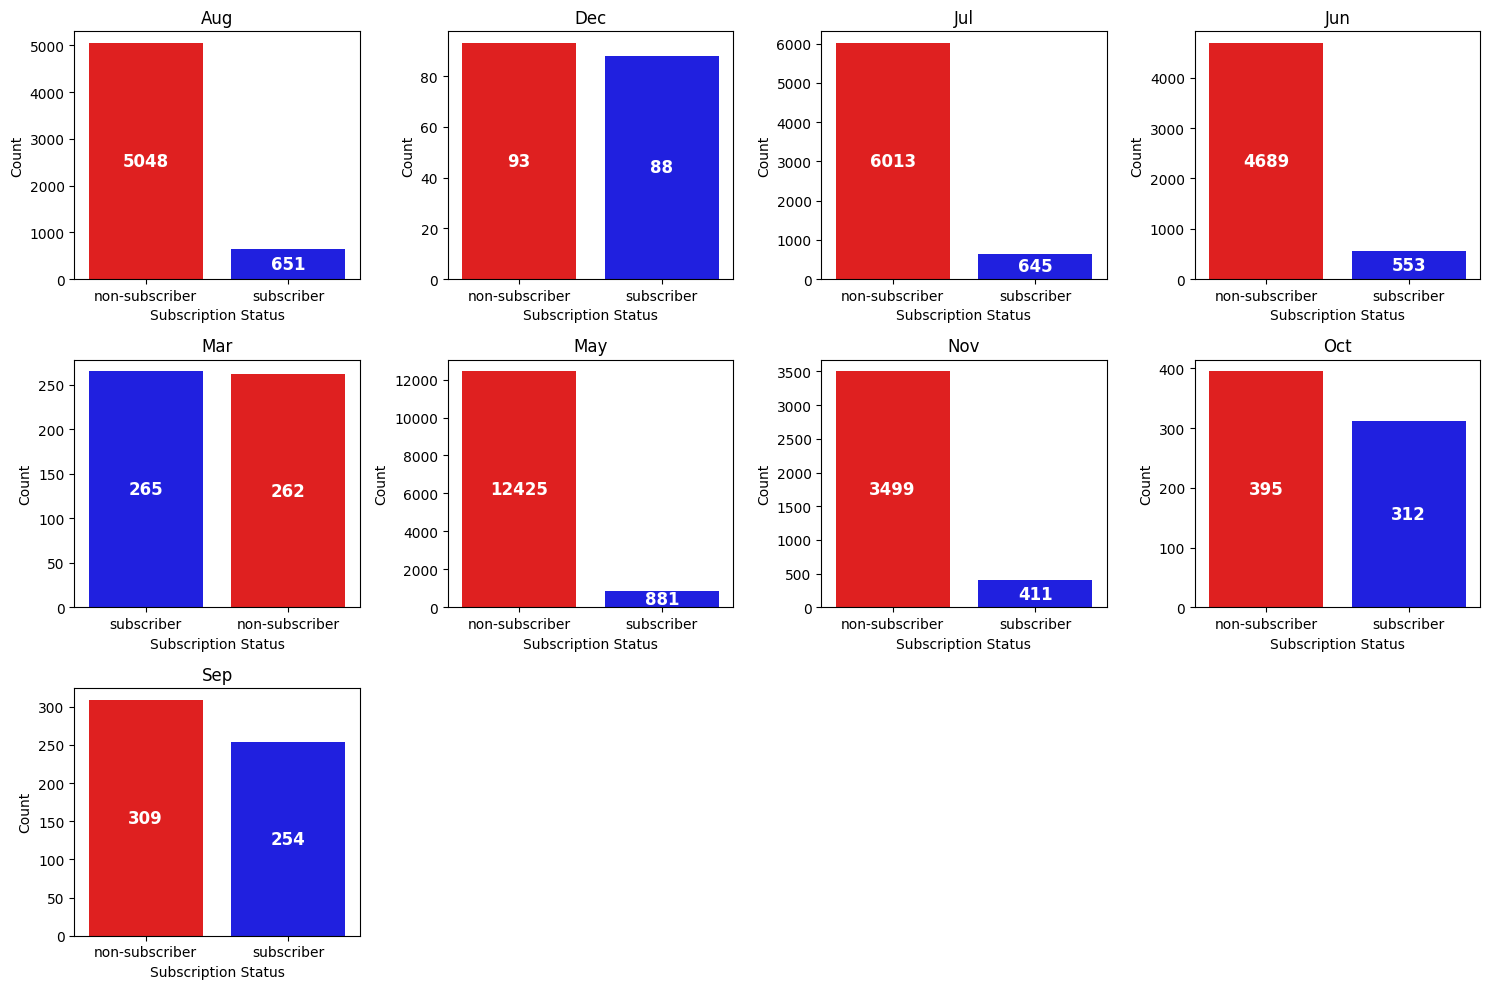

In [61]:
# Step 1: Create readable 'y_label' if not already done
df['y_label'] = df['y'].map({0: 'non-subscriber', 1: 'subscriber'})

# Step 2: Set the consistent red/blue palette
palette = {'non-subscriber': 'red', 'subscriber': 'blue'}

# Step 3: Select month dummy columns
month_cols = [col for col in categorical_cols if col.startswith('month_')]

plt.figure(figsize=(15, 10))

for i, col in enumerate(month_cols):
    plt.subplot(3, 4, i + 1)

    temp = df[df[col] == 1].copy()  # safer selection

    ax = ax = sns.countplot(data=temp, x='y_label', hue='y_label', palette=palette, legend=False)
    plt.title(col.replace('month_', '').capitalize())
    plt.xlabel('Subscription Status')
    plt.ylabel('Count')

    # Add count labels inside bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2,
            height * 0.5,
            int(height),
            ha='center', va='center',
            color='white', fontsize=12,
            fontweight='bold'
        )

plt.tight_layout()
plt.show()


# 📅 Monthly Subscription Status Analysis

This analysis breaks down the distribution of **subscriber vs. non-subscriber** counts for each month, based on a marketing campaign dataset. It highlights patterns in customer behavior over time.

---

## 🔍 Key Observations by Month

### 🟩 Months with Higher Subscription Rates
- **March**: 
  - Subscribers (265) slightly outnumber non-subscribers (262).
  - This is the only month with a **positive net subscriber count**.
- **September**:
  - 254 subscribers vs. 309 non-subscribers → relatively balanced.
- **October**:
  - 312 subscribers vs. 395 non-subscribers → also a close distribution.
- **December**:
  - 88 subscribers vs. 93 non-subscribers → nearly even.

📌 **Insight**: These months may represent periods where marketing campaigns were more effective or targeted better segments. This could be due to seasonality, fewer contacts, or personalized outreach.

---

### 🟥 Months with Lower Subscription Rates
- **May**:
  - Massive outreach with **12,425 non-subscribers** vs. only **881 subscribers**.
  - This suggests high activity but very low conversion.
- **July, August, June, November**:
  - All show several thousand non-subscribers compared to far fewer subscribers.
  - These months likely reflect **mass marketing campaigns** with low personalization or high resistance.

📌 **Insight**: These months had **low success rates**, indicating potential inefficiencies or misaligned targeting.

---

## 📈 Overall Takeaways
- **Conversion varies widely by month**, with some showing promising balance and others reflecting mass outreach with little return.
- Months with **smaller outreach volumes (e.g., March, October, December)** tended to have better subscription ratios.
- Suggests a need to **analyze campaign strategy, timing, and targeting** to improve performance.

---

## 🛠️ Recommendations
- **Further analyze March, September, October, and December** to identify what worked well (e.g., segmentation, offer, timing).
- Reevaluate the strategy used in **May, July, and August** where high outreach had poor results.
- Use these insights to guide **resource allocation and A/B testing** in future campaigns.



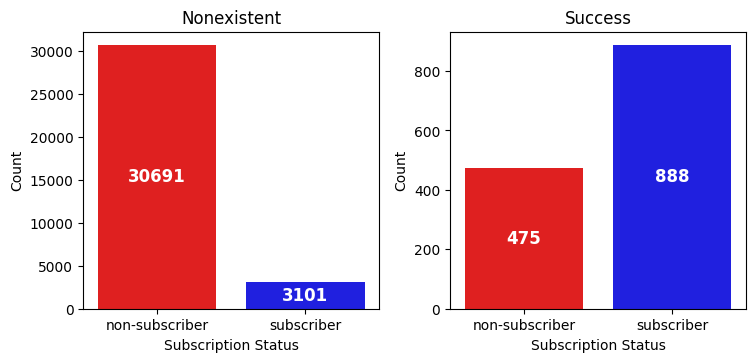

In [62]:
# Ensure readable labels are present
df['y_label'] = df['y'].map({0: 'non-subscriber', 1: 'subscriber'})

# Define consistent red/blue palette
palette = {'non-subscriber': 'red', 'subscriber': 'blue'}

# Get poutcome dummy columns
poutcome_cols = [col for col in categorical_cols if col.startswith('poutcome_')]

plt.figure(figsize=(15, 10))

for i, col in enumerate(poutcome_cols):
    plt.subplot(3, 4, i + 1)

    temp = df[df[col] == 1].copy()

    ax = sns.countplot(data=temp, x='y_label', hue='y_label', palette=palette, legend=False)
    plt.title(col.replace('poutcome_', '').capitalize())
    plt.xlabel('Subscription Status')
    plt.ylabel('Count')

    # Add count labels
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2,
            height * 0.5,
            int(height),
            ha='center', va='center',
            color='white', fontsize=12,
            fontweight='bold'
        )

plt.tight_layout()
plt.show()


# 📋 Previous Campaign Outcome vs Subscription Status

This analysis explores how the outcome of a **previous marketing campaign** (`poutcome`) relates to current **subscription status**.

## 🔍 Key Categories

### 1. 🟥 `Nonexistent`
- **Non-subscribers**: 30,691  
- **Subscribers**: 3,101  
- This group represents customers who were **not previously contacted**.
- 📌 **Insight**: Despite having no past interaction, some customers still subscribed. However, the **conversion rate is low** (~9.2%).

### 2. 🟦 `Success`
- **Non-subscribers**: 475  
- **Subscribers**: 888  
- These customers were contacted before and **previously subscribed**.
- 📌 **Insight**: This group has a **very high conversion rate** (~65.1%), suggesting strong targeting potential.

---

## 📈 Overall Observations

- Customers with **prior successful campaign interactions** are **much more likely to subscribe again**.
- The majority of the dataset falls under the **`Nonexistent`** category, which shows **low but non-zero conversions**, highlighting the importance of even first-time contact.
- The stark difference in subscription likelihood between these two groups shows how **past campaign success is a powerful predictor**.

---

## 🛠️ Recommendation

- Leverage previous success data to **re-target responsive customers**.
- Consider segmenting and prioritizing customers based on past outcomes when designing new marketing campaigns.


Next, lets take a look at a correlation heatmaps for numerical features.

The numerical features are as follows:

numerical_features = [
    'age',
    'previous',
    'emp.var.rate',
    'cons.price.idx',
    'cons.conf.idx',
    'euribor3m',
    'nr.employed'
]

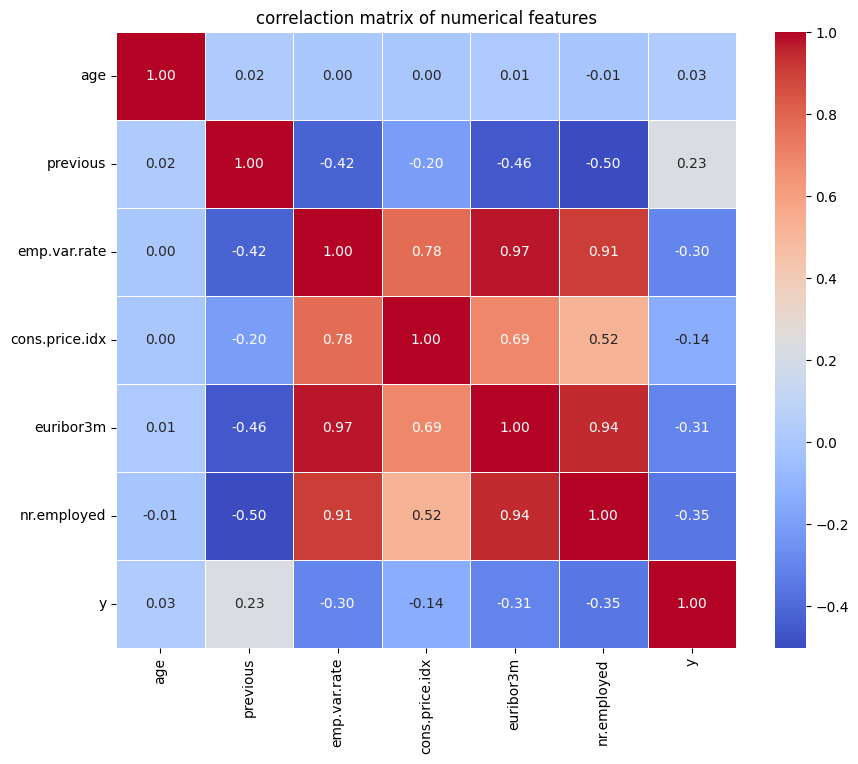

In [63]:
#EDA step 3: Correlation matrix for numerical features

#first thing is first, lets numerical features
numerical_features = ['age', 'previous', 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed', 'y']

#lets create a correlation matrix
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('correlaction matrix of numerical features')
plt.show()

### 🔍 Observations: Correlation with Target Variable (`y`)

From the correlation matrix, we observe the following relationships between the numerical features and the target variable `y` (whether the client subscribed to a term deposit):

- `nr.employed`: **-0.35**  
  ↳ Clients were less likely to subscribe when the number of employees was higher.

- `euribor3m`: **-0.31**  
  ↳ Lower interest rates (euribor) were associated with a higher likelihood of subscription.

- `emp.var.rate`: **-0.30**  
  ↳ Lower employment variation rates correlated with more term deposit subscriptions.

These negative correlations suggest that **clients were more likely to subscribe to a term deposit during periods of economic downturn** or uncertainty.

⚠️ **Note on Multicollinearity**:
- `euribor3m`, `emp.var.rate`, and `nr.employed` are all highly positively correlated with one another (e.g., 0.91–0.97).
- This could introduce multicollinearity in modeling, so consider **removing one or two of these** if using linear models.

✅ **Next steps**:
- Use `.sort_values()` on the correlation with `y` to rank features.
- Consider visualizing key features with boxplots or histograms segmented by `y`.
- Explore interaction terms or feature engineering if building a predictive model.


In [64]:
#Now lets use sort_values to see which features are most correlated with the target variable 'y'
correlcation_with_target_ranked = correlation_matrix['y'].sort_values(ascending=False)
print("Correlation with target variable 'y':")
#print(correlcation_with_target_ranked)

Correlation with target variable 'y':


### 📊 Ranked Correlation with Target Variable `y`

| Feature          | Correlation |
|------------------|-------------|
| y                | 1.000       |
| previous         | **+0.229**  |
| age              | +0.028      |
| cons.price.idx   | -0.137      |
| emp.var.rate     | **-0.298**  |
| euribor3m        | **-0.307**  |
| nr.employed      | **-0.354**  |

#### 🔍 Takeaways:
- `previous` is the **most positively correlated** feature with `y`. More prior contacts generally increases likelihood of subscription.
- `nr.employed`, `euribor3m`, and `emp.var.rate` are **moderately negatively correlated**, suggesting that clients are more likely to subscribe during **economic downturns**.
- `age` and `cons.price.idx` have **weak or negligible correlation**.




I am goint to use Principal Component Analyis for dimensionality reduction before modeling.

⚙️ Planned Approach: Principal Component Analysis (PCA)
PCA will be applied before modeling to:

📉 Remove multicollinearity — reduce redundancy from highly correlated features.

🚀 Speed up modeling — fewer components can improve computation time.

📈 Potentially boost performance — cleaner feature space may improve predictive accuracy.

🛡 Retain essential information — keep most of the original variance while reducing dimensionality.

In [71]:
# Import necessary tools
from sklearn.decomposition import PCA                 # PCA is used for dimensionality reduction
from sklearn.preprocessing import StandardScaler      # StandardScaler standardizes data (mean = 0, std = 1)

# STEP 1: Standardize the numerical features (important for PCA)
# PCA is sensitive to the scale of the data — large numbers can dominate variance.
# So we scale all numerical features to have the same influence.
x_scaled = StandardScaler().fit_transform(df[numerical_features[:-1]])  # last column is 'y' (target), so we exclude it from scaling
# Note: `numerical_features[:-1]` slices off the last column, which is 'y' (the target). We don’t scale that.

# STEP 2: Create PCA object
# We set `n_components=0.95` to tell PCA:
# "Keep as many components (new features) as needed to explain 95% of the variance in the data"
pca = PCA(n_components=0.95)

# STEP 3: Fit PCA to the scaled data and transform it
# This reduces the feature set from the original variables into a smaller number of "principal components"
X_pca = pca.fit_transform(x_scaled)

# STEP 4: Print how many features we had, and how many we retained after PCA
print(f"Original number of features: {x_scaled.shape[1]}")
# e.g., "Original number of features: 6" (if you had 6 numeric features)

print(f"Reduced number of features after PCA: {X_pca.shape[1]}")
# e.g., "Reduced number of features after PCA: 3"

print(f"Number of components retained: {pca.n_components_}")
# This confirms how many principal components PCA kept to reach 95% of variance

#what features were removed? 
# #PCA doesn’t “remove” specific features — instead, it creates entirely new features (called principal components) that are 
# linear combinations of the original ones.



Original number of features: 6
Reduced number of features after PCA: 4
Number of components retained: 4


## ✅ Next Steps: Understanding PCA Output and Deciding What to Do Next

Now that PCA has reduced our features from 6 to 4 principal components, it's important to **understand which original features contribute most** to each component.

---

### 📌 Step 1: View Principal Component Loadings

This tells us how much each original feature contributes to each principal component.

```python
# Create a DataFrame to see how each original feature loads onto each principal component
pca_components = pd.DataFrame(
    pca.components_, 
    columns=numerical_features[:-1],  # exclude 'y'
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)

# Show the loadings
pca_components.T  # Transposed for easier reading


In [72]:
pca_components = pd.DataFrame(pca.components_, columns=numerical_features[:-1], index=[f'PC{i+1}' for i in range(pca.n_components_)])

pca_components.T


,PC1,PC2,PC3,PC4
age,-0.001852,0.990345,-0.136972,0.009250
previous,-0.289831,0.119364,0.839987,-0.442128
emp.var.rate,0.511806,0.023703,0.148127,-0.082223
cons.price.idx,0.397184,0.057574,0.488829,0.703010
euribor3m,0.510066,0.024227,0.052103,-0.247059
nr.employed,0.485929,-0.022487,-0.109775,-0.492357


## PCA Loadings Interpretation

| PC   | Key Drivers | Interpretation |
|------|-------------|----------------|
| **PC1** | `emp.var.rate` (0.512), `euribor3m` (0.510), `nr.employed` (0.486), `cons.price.idx` (0.398), `previous` (-0.289) | Represents **macroeconomic conditions** — higher employment variation rate, interest rates, employment numbers, and consumer price index. Positive PC1 = stronger economy. |
| **PC2** | `age` (0.990) | Almost entirely an **age** axis — variation here is driven by customer age. |
| **PC3** | `previous` (0.840), `cons.price.idx` (0.489), `emp.var.rate` (0.148) | Captures **previous contact history** with some influence from price index. |
| **PC4** | `cons.price.idx` (0.703), `previous` (-0.442), `nr.employed` (-0.492) | Contrasts **high consumer price index** against **low previous contacts** and **low employment numbers**. |

### How to read loadings
- **Positive values** → feature increases as the component increases.  
- **Negative values** → feature decreases as the component increases.  
- **Magnitude** → importance of the feature in defining that component (values > |0.5| are generally strong).  
- **Uncorrelated PCs** → each captures a different dimension of variance in your dataset.
